In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


**Importing Libraries & Datasets**

In [57]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')



In [58]:
# Display the first few rows of the dataset
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**Data Processing & Future Engineering**

In [60]:
# Display Basic Information
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [61]:
#Checking for missing values
missing_train = (df_train.isnull().sum() / len(df_train)) * 100
missing_test = (df_test.isnull().sum() / len(df_test)) * 100
print("Missing values in train data:\n", missing_train[missing_train > 0].sort_values(ascending=False))
print("Missing values in test data:\n", missing_test[missing_test > 0].sort_values(ascending=False))

Missing values in train data:
 PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64
Missing values in test data:
 PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
MasVnrType      61.274846
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2  

In [62]:
# Feature Engineering: Add new features
df_train['TotalSquareFootage'] = df_train['GrLivArea'] + df_train['TotRmsAbvGrd']  # Total square footage
df_train['HouseAge'] = 2022 - df_train['YearBuilt']  # Age of the house


In [63]:
# Encoding categorical features
df_train = pd.get_dummies(df_train, drop_first=True)

In [64]:
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

In [65]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



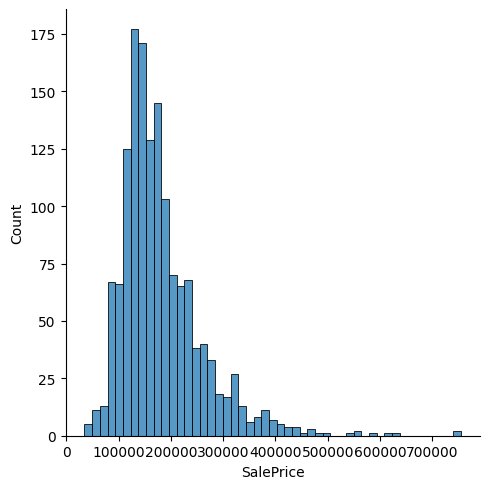

In [66]:
sns.displot(df_train['SalePrice'])

**Model Training & Evaluation**

In [67]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
# Check if there are NaN values
print(X_train.isna().sum())  # Check for NaN values


Id                         0
MSSubClass                 0
LotFrontage              217
LotArea                    0
OverallQual                0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 247, dtype: int64


In [69]:
# Impute missing values (if any) using median imputation
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # You can also use 'mean' or 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [70]:
# Now you can fit the models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [71]:

# Make predictions
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)


In [72]:
# Evaluate the models
rf_mae = mean_absolute_error(y_test, rf_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

rf_r2 = r2_score(y_test, rf_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print(f"Random Forest MAE: {rf_mae}, R^2: {rf_r2}")
print(f"Gradient Boosting MAE: {gb_mae}, R^2: {gb_r2}")

Random Forest MAE: 17617.29787671233, R^2: 0.8908084528390205
Gradient Boosting MAE: 17705.83682037642, R^2: 0.8940169434708547


**Visualization - Features Importance &Price Distribution**

In [73]:
# Feature Importance from Random Forest Model
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


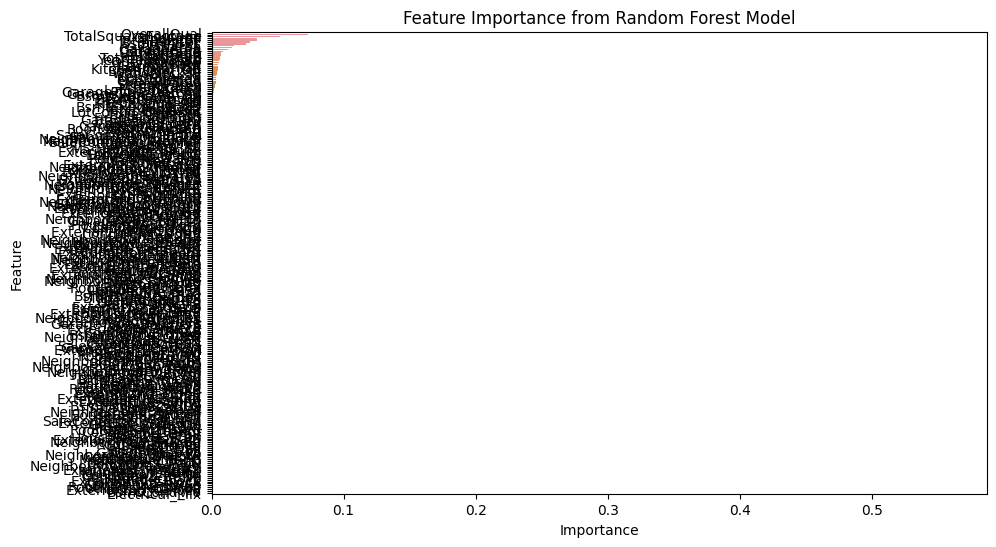

In [74]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importances)
plt.title('Feature Importance from Random Forest Model')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



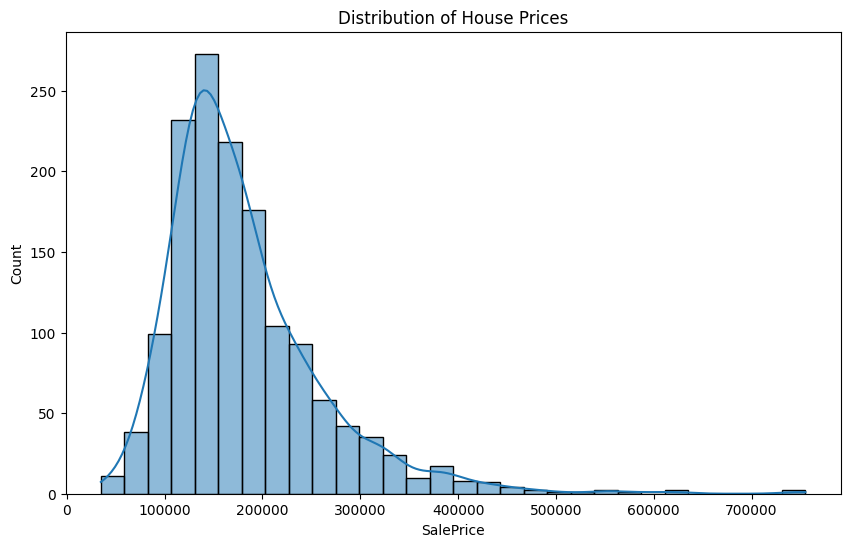

In [75]:
# Plot Distribution of House Prices
plt.figure(figsize=(10, 6))
sns.histplot(df_train['SalePrice'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.show()

**Dashboard for Interactive Visualization**

*Dash Installation and Verification*

In [76]:
!pip install Dash


In [77]:
import dash
print(dash.__version__)  # This should print the installed version of Dash


2.18.2


In [78]:
import dash
from dash import dcc
from dash import html
import dash_html_components as html
import plotly.graph_objs as go


In [79]:
# Creating a Dash application
app = dash.Dash(__name__)

In [80]:
# Dashboard Layout
app.layout = html.Div([
    html.H1('House Price Prediction Dashboard'),
    
    # Feature Importance Plot
    dcc.Graph(
        id='feature-importance',
        figure={
            'data': [
                go.Bar(
                    x=rf_importances['Importance'],
                    y=rf_importances['Feature'],
                    orientation='h'
                )
            ],
            'layout': go.Layout(
                title='Feature Importance from Random Forest Model',
                xaxis={'title': 'Importance'},
                yaxis={'title': 'Feature'}
            )
        }
    ),
    
    # House Price Distribution
    dcc.Graph(
        id='price-distribution',
        figure={
            'data': [
                go.Histogram(
                    x=df_train['SalePrice'],
                    nbinsx=30,
                    histnorm='probability density',
                    opacity=0.75
                )
            ],
            'layout': go.Layout(
                title='Distribution of House Prices',
                xaxis={'title': 'Sale Price'},
                yaxis={'title': 'Density'}
            )
        }
    ),
    
    # Predicted vs Actual Prices Plot
    dcc.Graph(
        id='predicted-vs-actual',
        figure={
            'data': [
                go.Scatter(
                    x=y_test,
                    y=gb_predictions,
                    mode='markers',
                    marker={'color': 'blue'},
                    name='Predicted vs Actual'
                )
            ],
            'layout': go.Layout(
                title='Predicted vs Actual House Prices',
                xaxis={'title': 'Actual Sale Price'},
                yaxis={'title': 'Predicted Sale Price'}
            )
        }
    )
])

In [81]:
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

**Model Hyperparameter Tuning**

In [82]:
# Hyperparameter Tuning with GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
